In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'numpy'

In [20]:
df = pd.read_csv('/kaggle/input/bitcoin-btc-usd-stock-dataset/BTC-USD_stock_data.csv',index_col='Date',parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [21]:
def plot_pred(test,pred):
    plt.plot(test, color='r',label='Actual Bitcoin price')
    plt.plot(pred, color='b',label='predicted Bitcoin price')
    plt.title('pedicted Bitcoin price')
    plt.xlabel('time')
    plt.ylabel('Bitcoin price')
    plt.legend()
    plt.show()
    
def return_rmse(test,pred):
    rmse = math.sqrt(mean_squared_error(test,pred))
    print('Root MSE = {}.'.format(rmse))

In [22]:
train_set = df[:'2020'].iloc[:,1:2].values
test_set = df['2021':].iloc[:,1:2].values

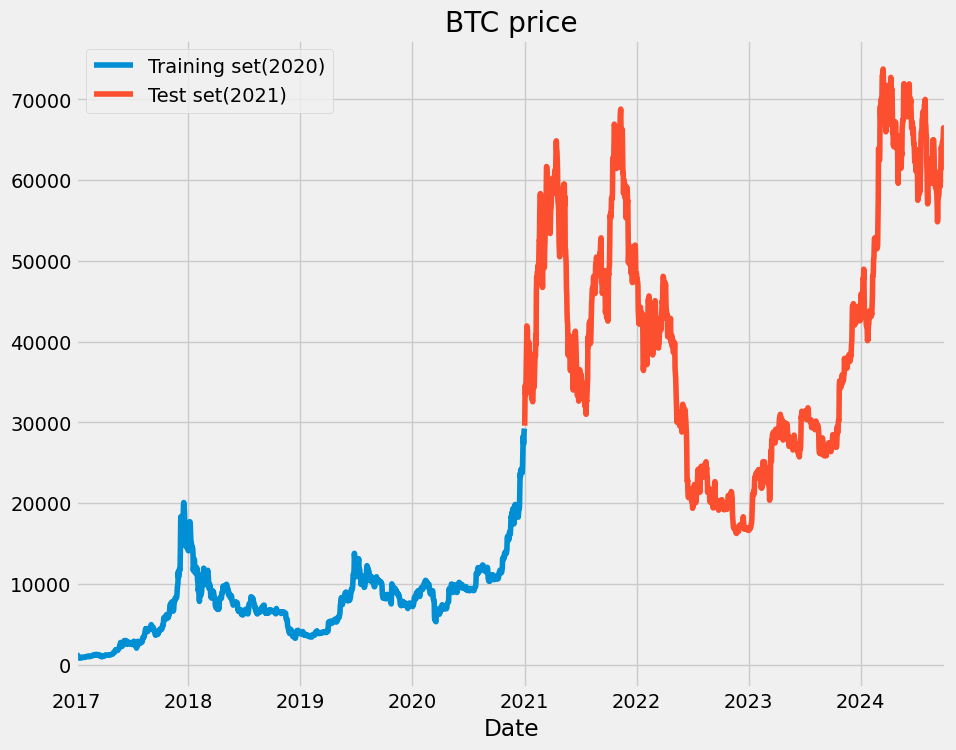

In [23]:
df['High'][:'2020'].plot(figsize=(10,8),legend=True)
df['High']['2021':].plot(figsize=(10,8),legend=True)
plt.legend(['Training set(2020)','Test set(2021)'])
plt.title('BTC price')
plt.show()

In [24]:
sc = MinMaxScaler(feature_range=(0,1))
train_set_sc = sc.fit_transform(train_set)

In [25]:
train_set_sc.shape

(1461, 1)

In [26]:
x_train = []
y_train = []
for i in range(60,1461):
    x_train.append(train_set_sc[i-60:i,0])
    y_train.append(train_set_sc[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [27]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [28]:
# LSTM
model_lstm = Sequential()

#1
model_lstm.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model_lstm.add(Dropout(0.2))

#2
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.2))

#3
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.2))

#4
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))

#Output
model_lstm.add(Dense(units=1))

#Compile RNN
model_lstm.compile(optimizer='rmsprop',loss='mean_squared_error')

#Fit training set
model_lstm.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.0257
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0059
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0048
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0036
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0038
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0029
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0033
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0027
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0033
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0026
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0027
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0022
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0019
Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0023
Epoch 15/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0023
Epo

In [29]:
df_total = pd.concat((df['High'][:'2020'],df['High']['2021':]),axis=0)
inputs = df_total[len(df_total)-len(test_set)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(1435, 1)

43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step


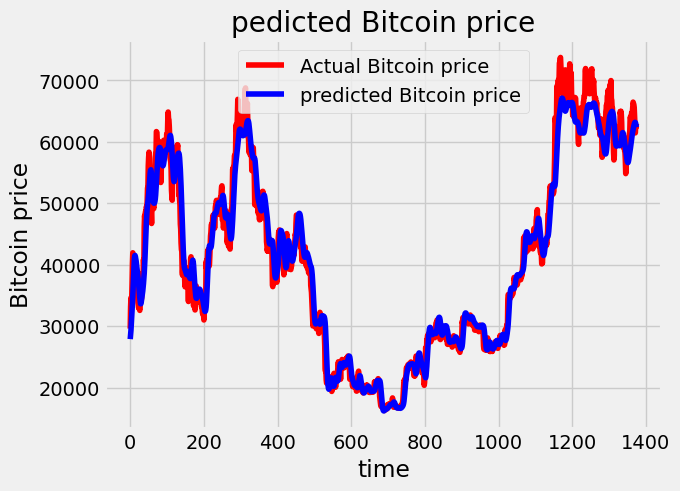

In [30]:
x_test=[]
for i in range(60,1435):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_harga = model_lstm.predict(x_test)
pred_harga = sc.inverse_transform(pred_harga)
plot_pred(test_set,pred_harga)

In [31]:
return_rmse(test_set,pred_harga)

Root MSE = 2793.7006790044725.


In [32]:
# GRU
lstm_gru = Sequential()

#1
lstm_gru.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation='tanh'))
lstm_gru.add(Dropout(0.2))

#2
lstm_gru.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation='tanh'))
lstm_gru.add(Dropout(0.2))

#3
lstm_gru.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation='tanh'))
lstm_gru.add(Dropout(0.2))

#4
lstm_gru.add(GRU(units=50,activation='tanh'))
lstm_gru.add(Dropout(0.2))

#Output
lstm_gru.add(Dense(units=1))

#Compile RNN
lstm_gru.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

# Fit untuk training test
lstm_gru.fit(x_train,y_train,epochs=50,batch_size=150)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step - loss: 0.0521
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - loss: 0.0278
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - loss: 0.0205
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - loss: 0.0172
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - loss: 0.0157
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - loss: 0.0139
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - loss: 0.0133
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - loss: 0.0101
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - loss: 0.0095
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - loss: 0.0067
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - loss: 0.0055
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - loss: 0.0040
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - loss: 0.0032
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - loss: 0.0025
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - loss: 0.0023


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step


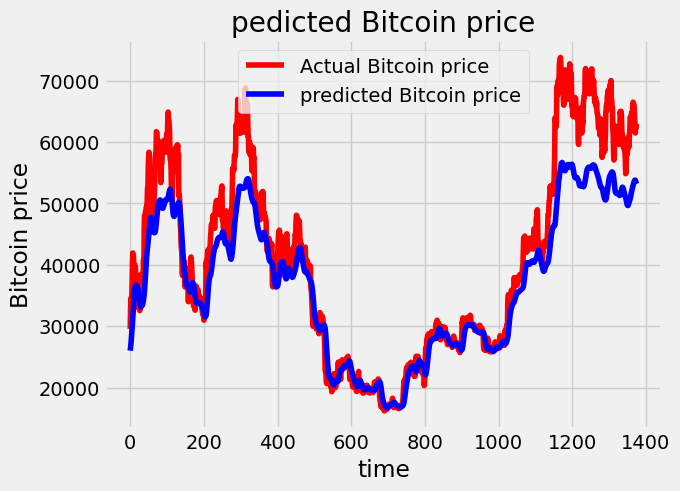

In [33]:
x_test = []
for i in range(60,1435):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_harga_gru = lstm_gru.predict(x_test)
pred_harga_gru = sc.inverse_transform(pred_harga_gru)
plot_pred(test_set,pred_harga_gru)

In [34]:
return_rmse(test_set,pred_harga_gru)

Root MSE = 6346.3099980117895.
